In [ ]:
I dont like Jupyter

# RDBMS

In [1]:
# Connecting to MySQL server

import pyodbc ### DONT COMMIT STUFF AGAIN, DELETE THE COMMIT() AT THE BOTTOM TO NOT DUPLICATE

# Connection details
server = 'tcp:mcruebs04.isad.isadroot.ex.ac.uk'
database = 'BEMM459_GroupAC'
username = 'GroupAC'
password = 'NauX781*Ek'

serverstring = ('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password+';TrustServerCertificate=yes;Encrypt=no;')

cnxn = pyodbc.connect(serverstring)
cursor = cnxn.cursor()

## Creating the tables

In [ ]:


Enter_All_Tables = '''
CREATE TABLE Employee_Data (
    employee_id INT IDENTITY(1,1) PRIMARY KEY,
    first_name VARCHAR(255) NOT NULL,
    last_name VARCHAR(255) NOT NULL,
    Department VARCHAR(255) NOT NULL,
    email VARCHAR(255) NOT NULL,
    role_ID INT NOT NULL
);

CREATE TABLE Roles (
    role_id INT IDENTITY(1,1) PRIMARY KEY,
    role_name VARCHAR(255) NOT NULL
);

CREATE TABLE Permissions (
    permission_id INT IDENTITY(1,1) PRIMARY KEY,
    permission_description VARCHAR(255) NOT NULL
);

CREATE TABLE Roles_Permissions (
    role_id INT NOT NULL,
    permission_id INT NOT NULL,
    PRIMARY KEY(role_id, permission_id),
    FOREIGN KEY (role_id) REFERENCES Roles(role_id) ON UPDATE CASCADE ON DELETE CASCADE,
    FOREIGN KEY (permission_id) REFERENCES Permissions(permission_id) ON UPDATE CASCADE ON DELETE CASCADE
);

CREATE TABLE Protocol_Data (
    protocol_id INT PRIMARY KEY,
    protocol_name VARCHAR(255) NOT NULL
);

CREATE TABLE Network_Usage (
    network_usage_id INT IDENTITY(1,1) PRIMARY KEY,
    employee_id INT NOT NULL,
    timestamp DATETIME NOT NULL,
    data_transfered_MB FLOAT NOT NULL,
    protocol_id INT NOT NULL,
    destination_ip VARCHAR(255) NOT NULL,
    FOREIGN KEY (employee_id) REFERENCES Employee_Data(employee_id) ON UPDATE CASCADE ON DELETE CASCADE,
    FOREIGN KEY (protocol_id) REFERENCES Protocol_Data(protocol_id) ON UPDATE CASCADE ON DELETE CASCADE
);

CREATE TABLE Access_Type (
    access_type_id INT IDENTITY(1,1) PRIMARY KEY,
    access_type_name VARCHAR(255) NOT NULL
);

CREATE TABLE File_Data (
    file_id INT IDENTITY(1,1) PRIMARY KEY,
    file_name VARCHAR(255) NOT NULL
);

CREATE TABLE File_Access (
    access_id INT IDENTITY(1,1) PRIMARY KEY,
    employee_id INT NOT NULL,
    access_type_id INT NOT NULL,
    timestamp DATETIME NOT NULL,
    file_id INT NOT NULL,
    FOREIGN KEY (employee_id) REFERENCES Employee_Data(employee_id) ON UPDATE CASCADE ON DELETE CASCADE,
    FOREIGN KEY (access_type_id) REFERENCES Access_Type(access_type_id) ON UPDATE CASCADE ON DELETE CASCADE,
    FOREIGN KEY (file_id) REFERENCES File_Data(file_id) ON UPDATE CASCADE ON DELETE CASCADE
);

CREATE TABLE Security_Incidents (
    incident_id INT IDENTITY(1,1) PRIMARY KEY,
    employee_id INT NOT NULL,
    timestamp DATETIME NOT NULL,
    incident_type VARCHAR(255) NOT NULL,
    resolution_status VARCHAR(255) NOT NULL,
    FOREIGN KEY (employee_id) REFERENCES Employee_Data(employee_id) ON UPDATE CASCADE ON DELETE CASCADE
);

CREATE TABLE Incident_Response (
    incident_response_id INT IDENTITY(1,1) PRIMARY KEY,
    incident_id INT NOT NULL,
    response_start_time DATETIME NOT NULL,
    response_end_time DATETIME NOT NULL,
    FOREIGN KEY (incident_id) REFERENCES Security_Incidents(incident_id) ON UPDATE CASCADE ON DELETE CASCADE
);

CREATE TABLE Detection_Method (
    detection_method_id INT IDENTITY(1,1) PRIMARY KEY,
    detection_method_name VARCHAR(255) NOT NULL
);

CREATE TABLE Detected_By (
    detected_by_id INT IDENTITY(1,1) PRIMARY KEY,
    detected_by_name VARCHAR(255) NOT NULL
);

CREATE TABLE Incident_Detection (
    incident_detection_id INT IDENTITY(1,1) PRIMARY KEY,
    incident_id INT NOT NULL,
    detection_time DATETIME NOT NULL,
    detection_method_id INT NOT NULL,
    detected_by_id INT NOT NULL,
    FOREIGN KEY (incident_id) REFERENCES Security_Incidents(incident_id) ON UPDATE CASCADE ON DELETE CASCADE,
    FOREIGN KEY (detection_method_id) REFERENCES Detection_Method(detection_method_id) ON UPDATE CASCADE ON DELETE CASCADE,
    FOREIGN KEY (detected_by_id) REFERENCES Detected_By(detected_by_id) ON UPDATE CASCADE ON DELETE CASCADE
);
'''

cursor.execute(Enter_All_Tables)

## Generating the data and populating the tables

In [ ]:
EmpNames = '''
INSERT INTO Employee_Data (first_name, last_name, Department, email, role_ID) VALUES
('Alice', 'Johnson', 'Finance', 'alice.johnson@bank.com', 1),
('Bob', 'Smith', 'IT', 'bob.smith@bank.com', 2),
('Charlie', 'Brown', 'HR', 'charlie.brown@bank.com', 3),
('David', 'Wilson', 'Cybersecurity', 'david.wilson@bank.com', 4),
('Emma', 'Davis', 'Operations', 'emma.davis@bank.com', 5),
('Frank', 'Miller', 'Finance', 'frank.miller@bank.com', 1),
('Grace', 'Moore', 'IT', 'grace.moore@bank.com', 2),
('Hannah', 'Taylor', 'HR', 'hannah.taylor@bank.com', 3),
('Isaac', 'Anderson', 'Cybersecurity', 'isaac.anderson@bank.com', 4),
('Jack', 'Thomas', 'Operations', 'jack.thomas@bank.com', 5),
('Kelly', 'White', 'Finance', 'kelly.white@bank.com', 1),
('Liam', 'Harris', 'IT', 'liam.harris@bank.com', 2),
('Mia', 'Martin', 'HR', 'mia.martin@bank.com', 3),
('Noah', 'Thompson', 'Cybersecurity', 'noah.thompson@bank.com', 4),
('Olivia', 'Garcia', 'Operations', 'olivia.garcia@bank.com', 5),
('Peter', 'Martinez', 'Finance', 'peter.martinez@bank.com', 1),
('Quinn', 'Robinson', 'IT', 'quinn.robinson@bank.com', 2),
('Ryan', 'Clark', 'HR', 'ryan.clark@bank.com', 3),
('Sophia', 'Rodriguez', 'Cybersecurity', 'sophia.rodriguez@bank.com', 4),
('Tyler', 'Lewis', 'Operations', 'tyler.lewis@bank.com', 5),
('Uma', 'Lee', 'Finance', 'uma.lee@bank.com', 1),
('Victor', 'Walker', 'IT', 'victor.walker@bank.com', 2),
('Wendy', 'Hall', 'HR', 'wendy.hall@bank.com', 3),
('Xander', 'Allen', 'Cybersecurity', 'xander.allen@bank.com', 4),
('Yara', 'Young', 'Operations', 'yara.young@bank.com', 5),
('Zach', 'King', 'Finance', 'zach.king@bank.com', 1),
('Amy', 'Scott', 'IT', 'amy.scott@bank.com', 2),
('Brian', 'Green', 'HR', 'brian.green@bank.com', 3),
('Chloe', 'Adams', 'Cybersecurity', 'chloe.adams@bank.com', 4),
('Daniel', 'Baker', 'Operations', 'daniel.baker@bank.com', 5),
('Ella', 'Gonzalez', 'Finance', 'ella.gonzalez@bank.com', 1),
('Finn', 'Nelson', 'IT', 'finn.nelson@bank.com', 2),
('George', 'Carter', 'HR', 'george.carter@bank.com', 3),
('Holly', 'Mitchell', 'Cybersecurity', 'holly.mitchell@bank.com', 4),
('Ian', 'Perez', 'Operations', 'ian.perez@bank.com', 5),
('Jane', 'Roberts', 'Finance', 'jane.roberts@bank.com', 1),
('Kevin', 'Phillips', 'IT', 'kevin.phillips@bank.com', 2),
('Laura', 'Evans', 'HR', 'laura.evans@bank.com', 3),
('Mason', 'Edwards', 'Cybersecurity', 'mason.edwards@bank.com', 4),
('Natalie', 'Collins', 'Operations', 'natalie.collins@bank.com', 5),
('Oscar', 'Stewart', 'Finance', 'oscar.stewart@bank.com', 1),
('Paul', 'Morris', 'IT', 'paul.morris@bank.com', 2),
('Rebecca', 'Nguyen', 'HR', 'rebecca.nguyen@bank.com', 3),
('Samuel', 'Murphy', 'Cybersecurity', 'samuel.murphy@bank.com', 4),
('Tina', 'Rivera', 'Operations', 'tina.rivera@bank.com', 5),
('Ursula', 'Foster', 'Finance', 'ursula.foster@bank.com', 1),
('Vince', 'Hayes', 'IT', 'vince.hayes@bank.com', 2),
('Walter', 'Perry', 'HR', 'walter.perry@bank.com', 3),
('Xenia', 'Long', 'Cybersecurity', 'xenia.long@bank.com', 4),
('Yasmine', 'Bryant', 'Operations', 'yasmine.bryant@bank.com', 5),
('Zane', 'Griffin', 'Finance', 'zane.griffin@bank.com', 1),
('Ava', 'Russell', 'Finance', 'ava.russell@bank.com', 1),
('Blake', 'Simmons', 'IT', 'blake.simmons@bank.com', 2),
('Cameron', 'Barnes', 'HR', 'cameron.barnes@bank.com', 3),
('Diana', 'Henderson', 'Cybersecurity', 'diana.henderson@bank.com', 4),
('Ethan', 'Coleman', 'Operations', 'ethan.coleman@bank.com', 5),
('Fiona', 'Powell', 'Finance', 'fiona.powell@bank.com', 1),
('Gavin', 'Jenkins', 'IT', 'gavin.jenkins@bank.com', 2),
('Hailey', 'Patterson', 'HR', 'hailey.patterson@bank.com', 3),
('Isaiah', 'Hughes', 'Cybersecurity', 'isaiah.hughes@bank.com', 4);
'''
cursor.execute(EmpNames)

protocoldata = '''
INSERT INTO Protocol_Data (protocol_id, protocol_name) VALUES
(1, 'HTTP'),
(2, 'FTP'),
(3, 'SSH'),
(4, 'DNS');
'''

cursor.execute(protocoldata)

NetworkInfo = '''
INSERT INTO Network_Usage (employee_id, timestamp, data_transfered_MB, protocol_id, destination_ip)
VALUES
(32, '2024-03-24 08:15:23', 45.6, 1, '192.168.1.10'),
(12, '2024-03-24 09:20:11', 12.3, 2, '10.0.0.5'),
(45, '2024-03-24 10:05:45', 78.9, 3, '172.16.0.2'),
(21, '2024-03-24 11:12:32', 23.1, 1, '192.168.1.15'),
(9, '2024-03-24 12:40:21', 56.7, 4, '10.0.0.8'),
(56, '2024-03-24 13:55:10', 98.2, 2, '172.16.1.3'),
(7, '2024-03-24 14:22:18', 34.5, 3, '192.168.2.20'),
(48, '2024-03-24 15:30:25', 87.4, 1, '10.0.1.15'),
(19, '2024-03-24 16:45:33', 14.2, 4, '172.16.2.4'),
(29, '2024-03-24 17:50:40', 61.5, 2, '192.168.3.11'),
(22, '2024-03-24 18:33:28', 39.7, 1, '10.0.2.6'),
(5, '2024-03-24 19:10:49', 73.9, 3, '172.16.3.7'),
(41, '2024-03-24 20:15:52', 29.4, 4, '192.168.4.18'),
(36, '2024-03-24 21:40:35', 51.2, 2, '10.0.3.9'),
(58, '2024-03-24 22:55:11', 89.6, 1, '172.16.4.2'),
(14, '2024-03-24 23:30:29', 10.8, 3, '192.168.5.13'),
(33, '2024-03-25 00:45:56', 92.1, 4, '10.0.4.20'),
(8, '2024-03-25 01:10:47', 37.3, 2, '172.16.5.9'),
(25, '2024-03-25 02:25:22', 58.6, 1, '192.168.6.7'),
(11, '2024-03-25 03:50:13', 41.9, 3, '10.0.5.3'),
(50, '2024-03-25 04:15:36', 67.5, 4, '172.16.6.15'),
(4, '2024-03-25 05:30:41', 83.7, 2, '192.168.7.10'),
(39, '2024-03-25 06:40:58', 19.4, 1, '10.0.6.12'),
(26, '2024-03-25 07:55:49', 44.6, 3, '172.16.7.8'),
(53, '2024-03-25 08:20:53', 78.3, 4, '192.168.8.6'),
(60, '2024-03-25 09:30:15', 23.9, 2, '10.0.7.5'),
(16, '2024-03-25 10:45:33', 52.8, 1, '172.16.8.10'),
(31, '2024-03-25 11:10:27', 61.4, 3, '192.168.9.20'),
(3, '2024-03-25 12:20:59', 95.2, 4, '10.0.8.17'),
(27, '2024-03-25 13:30:35', 38.1, 2, '172.16.9.11'),
(46, '2024-03-25 14:45:45', 72.5, 1, '192.168.10.9'),
(55, '2024-03-25 15:50:51', 20.7, 3, '10.0.9.4'),
(2, '2024-03-25 16:40:15', 87.9, 4, '172.16.10.3'),
(44, '2024-03-25 17:10:29', 47.6, 2, '192.168.11.8'),
(10, '2024-03-25 18:25:57', 56.2, 1, '10.0.10.6'),
(35, '2024-03-25 19:45:12', 14.9, 3, '172.16.11.5'),
(42, '2024-03-25 20:55:23', 92.3, 4, '192.168.12.7'),
(1, '2024-03-25 21:30:48', 33.5, 2, '10.0.11.20'),
(57, '2024-03-25 22:45:55', 71.6, 1, '172.16.12.13'),
(28, '2024-03-25 23:10:33', 60.9, 3, '192.168.13.14'),
(23, '2024-03-26 00:40:11', 49.2, 4, '10.0.12.3'),
(47, '2024-03-26 01:50:27', 78.8, 2, '172.16.13.12'),
(30, '2024-03-26 02:15:38', 37.1, 1, '192.168.14.15'),
(18, '2024-03-26 03:30:54', 98.4, 3, '10.0.13.8'),
(13, '2024-03-26 04:10:29', 29.5, 4, '172.16.14.11'),
(34, '2024-03-26 05:25:43', 51.7, 2, '192.168.15.9'),
(54, '2024-03-26 06:40:10', 80.1, 1, '10.0.14.7'),
(20, '2024-03-26 07:50:20', 66.3, 3, '172.16.15.10'),
(15, '2024-03-26 08:15:49', 23.7, 4, '192.168.16.4'),
(6, '2024-03-26 09:30:58', 90.9, 2, '10.0.15.18'),
(17, '2024-03-26 10:05:23', 55.2, 1, '192.168.17.10'),
(38, '2024-03-26 11:20:35', 12.7, 2, '10.0.16.15'),
(24, '2024-03-26 12:45:12', 78.3, 3, '172.16.17.6'),
(43, '2024-03-26 13:30:41', 42.1, 4, '192.168.18.14'),
(59, '2024-03-26 14:50:59', 97.6, 1, '10.0.17.5'),
(9, '2024-03-26 15:35:27', 34.2, 2, '172.16.18.9'),
(12, '2024-03-26 16:10:48', 66.7, 3, '192.168.19.7'),
(27, '2024-03-26 17:25:13', 22.5, 4, '10.0.18.12'),
(46, '2024-03-26 18:40:22', 81.4, 1, '172.16.19.4'),
(3, '2024-03-26 19:10:38', 47.3, 2, '192.168.20.8'),
(35, '2024-03-26 20:55:44', 59.9, 3, '10.0.19.10'),
(14, '2024-03-26 21:30:57', 92.5, 4, '172.16.20.15'),
(55, '2024-03-26 22:40:21', 39.2, 1, '192.168.21.3'),
(11, '2024-03-26 23:10:59', 78.7, 2, '10.0.20.9'),
(48, '2024-03-27 00:25:34', 28.6, 3, '172.16.21.14'),
(5, '2024-03-27 01:45:17', 50.1, 4, '192.168.22.5'),
(60, '2024-03-27 02:15:49', 64.2, 1, '10.0.21.17'),
(21, '2024-03-27 03:30:56', 97.3, 2, '172.16.22.8'),
(2, '2024-03-27 04:10:27', 14.5, 3, '192.168.23.6'),
(29, '2024-03-27 05:55:13', 42.8, 4, '10.0.22.3'),
(33, '2024-03-27 06:40:41', 76.1, 1, '172.16.23.11'),
(50, '2024-03-27 07:20:35', 54.9, 2, '192.168.24.10'),
(37, '2024-03-27 08:35:44', 89.7, 3, '10.0.23.7'),
(13, '2024-03-27 09:55:58', 19.3, 4, '172.16.24.12'),
(41, '2024-03-27 10:45:39', 85.2, 1, '192.168.25.9'),
(19, '2024-03-27 11:30:47', 31.7, 2, '10.0.24.5'),
(45, '2024-03-27 12:55:23', 60.4, 3, '172.16.25.8'),
(7, '2024-03-27 13:40:33', 98.9, 4, '192.168.26.6'),
(30, '2024-03-27 14:20:56', 44.3, 1, '10.0.25.4'),
(56, '2024-03-27 15:10:29', 71.1, 2, '172.16.26.14'),
(8, '2024-03-27 16:40:15', 20.8, 3, '192.168.27.11'),
(54, '2024-03-27 17:25:31', 88.2, 4, '10.0.26.3'),
(31, '2024-03-27 18:50:48', 35.6, 1, '172.16.27.9'),
(23, '2024-03-27 19:30:59', 53.2, 2, '192.168.28.7'),
(16, '2024-03-27 20:10:45', 76.5, 3, '10.0.27.5'),
(52, '2024-03-27 21:45:23', 90.3, 4, '172.16.28.10'),
(4, '2024-03-27 22:20:57', 41.9, 1, '192.168.29.8'),
(39, '2024-03-27 23:40:12', 68.1, 2, '10.0.28.9'),
(25, '2024-03-28 00:30:44', 82.7, 3, '172.16.29.11'),
(44, '2024-03-28 12:32:22', 12.7, 3, '192.168.11.8');
'''

cursor.execute(NetworkInfo)

RoleInput = '''
INSERT INTO Roles (role_name) VALUES 
('Finance'),
('IT'),
('HR'),
('Cybersecurity'),
('Operations');
'''

cursor.execute(RoleInput)

PermInput = '''
INSERT INTO Permissions (permission_description) VALUES 
('View Reports'),
('Edit Reports'),
('Manage Users'),
('Access Financial Data'),
('Modify IT Infrastructure'),
('Manage HR Records'),
('Access Cybersecurity Systems'),
('Monitor Security Alerts'),
('Process Operations Requests'),
('Approve Operational Changes');
'''

cursor.execute(PermInput)

RolePermInput = '''
INSERT INTO Roles_Permissions (role_id, permission_id) VALUES 
-- Finance
(1, 1), -- View Reports
(1, 4), -- Access Financial Data

-- IT
(2, 5), -- Modify IT Infrastructure
(2, 8), -- Monitor Security Alerts

-- HR
(3, 3), -- Manage Users
(3, 6), -- Manage HR Records

-- Cybersecurity
(4, 7), -- Access Cybersecurity Systems
(4, 8), -- Monitor Security Alerts

-- Operations
(5, 9), -- Process Operations Requests
(5, 10); -- Approve Operational Changes
'''

cursor.execute(PermInput)

SecurtyInput = '''
INSERT INTO Security_Incidents (employee_id, timestamp, incident_type, resolution_status) VALUES 
(5, '2024-03-25 08:20:53', 'Unauthorized Access', 'Resolved'),
(12, '2024-03-28 12:32:20', 'Malware Infection', 'In Progress'),
(21, '2024-03-27 14:20:56', 'Phishing Attack', 'Resolved'),
(8, '2024-03-27 10:45:39', 'Data Breach', 'Resolved'),
(36, '2024-03-27 04:10:27', 'Password Compromise', 'In Progress'),
(40, '2024-03-26 07:50:20', 'Insider Threat', 'Resolved'),
(27, '2024-03-26 11:20:35', 'System Outage', 'In Progress'),
(2, '2024-03-26 14:50:59', 'Denial of Service', 'Resolved'),
(13, '2024-03-26 15:35:27', 'Unauthorized Access', 'Resolved'),
(18, '2024-03-26 18:40:22', 'Malware Infection', 'In Progress'),
(9, '2024-03-25 01:10:47', 'Phishing Attack', 'Resolved'),
(34, '2024-03-24 08:15:23', 'Data Breach', 'Resolved'),
(16, '2024-03-24 09:20:11', 'Password Compromise', 'In Progress'),
(48, '2024-03-24 10:05:45', 'Insider Threat', 'Resolved'),
(26, '2024-03-24 11:12:32', 'System Outage', 'In Progress'),
(1, '2024-03-24 12:40:21', 'Denial of Service', 'Resolved'),
(11, '2024-03-24 13:55:10', 'Unauthorized Access', 'Resolved'),
(3, '2024-03-24 14:22:18', 'Malware Infection', 'In Progress'),
(7, '2024-03-24 15:30:25', 'Phishing Attack', 'Resolved'),
(31, '2024-03-24 16:45:33', 'Data Breach', 'Resolved'),
(22, '2024-03-24 17:50:40', 'Password Compromise', 'In Progress'),
(41, '2024-03-24 18:33:28', 'Insider Threat', 'Resolved'),
(30, '2024-03-24 19:10:49', 'System Outage', 'In Progress'),
(28, '2024-03-24 20:15:52', 'Denial of Service', 'Resolved'),
(14, '2024-03-24 21:40:35', 'Unauthorized Access', 'Resolved'),
(35, '2024-03-24 22:55:11', 'Malware Infection', 'In Progress'),
(50, '2024-03-25 00:45:56', 'Phishing Attack', 'Resolved'),
(47, '2024-03-25 01:10:47', 'Data Breach', 'Resolved'),
(33, '2024-03-25 02:25:22', 'Password Compromise', 'In Progress'),
(20, '2024-03-25 03:50:13', 'Insider Threat', 'Resolved'),
(56, '2024-03-25 04:15:36', 'System Outage', 'In Progress');
'''

cursor.execute(SecurtyInput)

detectedby = '''
INSERT INTO Detected_By (detected_by_name) VALUES
('Security Team'),
('Automated System'),
('End User'),
('Firewall System');
'''

cursor.execute(detectedby)

detectionmethod = '''
INSERT INTO Detection_Method (detection_method_name) VALUES
('Automated Monitoring'),
('Intrusion Detection System'),
('User Report'),
('Firewall Alert');
'''

cursor.execute(detectionmethod)

incidentDetect = '''
INSERT INTO Incident_Detection (incident_id, detection_time, detection_method_id, detected_by_id) VALUES
(1, '2024-03-25 08:20:53', 1, 1),  -- Incident 1, Detection Method: Automated Monitoring, Detected By: Security Team
(2, '2024-03-28 12:32:20', 2, 2),  -- Incident 2, Detection Method: Intrusion Detection System, Detected By: Automated System
(3, '2024-03-27 14:20:56', 3, 3),  -- Incident 3, Detection Method: User Report, Detected By: End User
(4, '2024-03-27 10:45:39', 4, 4),  -- Incident 4, Detection Method: Firewall Alert, Detected By: Firewall System
(5, '2024-03-27 04:10:27', 1, 1),  -- Incident 5, Detection Method: Automated Monitoring, Detected By: Security Team
(6, '2024-03-26 07:50:20', 2, 2),  -- Incident 6, Detection Method: Intrusion Detection System, Detected By: Automated System
(7, '2024-03-26 11:20:35', 3, 3),  -- Incident 7, Detection Method: User Report, Detected By: End User
(8, '2024-03-26 14:50:59', 4, 4),  -- Incident 8, Detection Method: Firewall Alert, Detected By: Firewall System
(9, '2024-03-26 15:35:27', 1, 1),  -- Incident 9, Detection Method: Automated Monitoring, Detected By: Security Team
(10, '2024-03-26 18:40:22', 2, 2), -- Incident 10, Detection Method: Intrusion Detection System, Detected By: Automated System
(11, '2024-03-25 01:10:47', 3, 3), -- Incident 11, Detection Method: User Report, Detected By: End User
(12, '2024-03-24 08:15:23', 4, 4), -- Incident 12, Detection Method: Firewall Alert, Detected By: Firewall System
(13, '2024-03-24 09:20:11', 1, 1), -- Incident 13, Detection Method: Automated Monitoring, Detected By: Security Team
(14, '2024-03-24 10:05:45', 2, 2), -- Incident 14, Detection Method: Intrusion Detection System, Detected By: Automated System
(15, '2024-03-24 11:12:32', 3, 3), -- Incident 15, Detection Method: User Report, Detected By: End User
(16, '2024-03-24 12:40:21', 4, 4), -- Incident 16, Detection Method: Firewall Alert, Detected By: Firewall System
(17, '2024-03-24 13:55:10', 1, 1), -- Incident 17, Detection Method: Automated Monitoring, Detected By: Security Team
(18, '2024-03-24 14:22:18', 2, 2), -- Incident 18, Detection Method: Intrusion Detection System, Detected By: Automated System
(19, '2024-03-24 15:30:25', 3, 3), -- Incident 19, Detection Method: User Report, Detected By: End User
(20, '2024-03-24 16:45:33', 4, 4), -- Incident 20, Detection Method: Firewall Alert, Detected By: Firewall System
(21, '2024-03-24 17:50:40', 1, 1), -- Incident 21, Detection Method: Automated Monitoring, Detected By: Security Team
(22, '2024-03-24 18:33:28', 2, 2), -- Incident 22, Detection Method: Intrusion Detection System, Detected By: Automated System
(23, '2024-03-24 19:10:49', 3, 3), -- Incident 23, Detection Method: User Report, Detected By: End User
(24, '2024-03-24 20:15:52', 4, 4), -- Incident 24, Detection Method: Firewall Alert, Detected By: Firewall System
(25, '2024-03-24 21:40:35', 1, 1), -- Incident 25, Detection Method: Automated Monitoring, Detected By: Security Team
(26, '2024-03-24 22:55:11', 2, 2), -- Incident 26, Detection Method: Intrusion Detection System, Detected By: Automated System
(27, '2024-03-25 00:45:56', 3, 3), -- Incident 27, Detection Method: User Report, Detected By: End User
(28, '2024-03-25 01:10:47', 4, 4), -- Incident 28, Detection Method: Firewall Alert, Detected By: Firewall System
(29, '2024-03-25 02:25:22', 1, 1), -- Incident 29, Detection Method: Automated Monitoring, Detected By: Security Team
(30, '2024-03-25 03:50:13', 2, 2), -- Incident 30, Detection Method: Intrusion Detection System, Detected By: Automated System
(31, '2024-03-25 04:15:36', 3, 3); -- Incident 31, Detection Method: User Report, Detected By: End User
'''


cursor.execute(incidentDetect)


incidentresponse = '''
INSERT INTO Incident_Response (incident_id, response_start_time, response_end_time) VALUES
(1, '2024-03-25 08:30:00', '2024-03-25 09:00:00'),  -- Incident 1, Response Start: 08:30 AM, Response End: 09:00 AM
(2, '2024-03-28 12:45:00', '2024-03-28 13:30:00'),  -- Incident 2, Response Start: 12:45 PM, Response End: 01:30 PM
(3, '2024-03-27 14:30:00', '2024-03-27 15:00:00'),  -- Incident 3, Response Start: 02:30 PM, Response End: 03:00 PM
(4, '2024-03-27 10:50:00', '2024-03-27 11:20:00'),  -- Incident 4, Response Start: 10:50 AM, Response End: 11:20 AM
(5, '2024-03-27 04:15:00', '2024-03-27 04:45:00'),  -- Incident 5, Response Start: 04:15 AM, Response End: 04:45 AM
(6, '2024-03-26 08:00:00', '2024-03-26 08:30:00'),  -- Incident 6, Response Start: 08:00 AM, Response End: 08:30 AM
(7, '2024-03-26 11:40:00', '2024-03-26 12:10:00'),  -- Incident 7, Response Start: 11:40 AM, Response End: 12:10 PM
(8, '2024-03-26 15:00:00', '2024-03-26 15:30:00'),  -- Incident 8, Response Start: 03:00 PM, Response End: 03:30 PM
(9, '2024-03-26 15:50:00', '2024-03-26 16:20:00'),  -- Incident 9, Response Start: 03:50 PM, Response End: 04:20 PM
(10, '2024-03-26 18:45:00', '2024-03-26 19:15:00'), -- Incident 10, Response Start: 06:45 PM, Response End: 07:15 PM
(11, '2024-03-25 01:15:00', '2024-03-25 01:45:00'), -- Incident 11, Response Start: 01:15 AM, Response End: 01:45 AM
(12, '2024-03-24 08:30:00', '2024-03-24 09:00:00'), -- Incident 12, Response Start: 08:30 AM, Response End: 09:00 AM
(13, '2024-03-24 09:30:00', '2024-03-24 10:00:00'), -- Incident 13, Response Start: 09:30 AM, Response End: 10:00 AM
(14, '2024-03-24 10:15:00', '2024-03-24 10:45:00'), -- Incident 14, Response Start: 10:15 AM, Response End: 10:45 AM
(15, '2024-03-24 11:30:00', '2024-03-24 12:00:00'), -- Incident 15, Response Start: 11:30 AM, Response End: 12:00 PM
(16, '2024-03-24 12:50:00', '2024-03-24 13:20:00'), -- Incident 16, Response Start: 12:50 PM, Response End: 01:20 PM
(17, '2024-03-24 13:55:00', '2024-03-24 14:25:00'), -- Incident 17, Response Start: 01:55 PM, Response End: 02:25 PM
(18, '2024-03-24 14:30:00', '2024-03-24 15:00:00'), -- Incident 18, Response Start: 02:30 PM, Response End: 03:00 PM
(19, '2024-03-24 15:35:00', '2024-03-24 16:05:00'), -- Incident 19, Response Start: 03:35 PM, Response End: 04:05 PM
(20, '2024-03-24 16:50:00', '2024-03-24 17:20:00'), -- Incident 20, Response Start: 04:50 PM, Response End: 05:20 PM
(21, '2024-03-24 17:55:00', '2024-03-24 18:25:00'), -- Incident 21, Response Start: 05:55 PM, Response End: 06:25 PM
(22, '2024-03-24 18:45:00', '2024-03-24 19:15:00'), -- Incident 22, Response Start: 06:45 PM, Response End: 07:15 PM
(23, '2024-03-24 19:25:00', '2024-03-24 19:55:00'), -- Incident 23, Response Start: 07:25 PM, Response End: 07:55 PM
(24, '2024-03-24 20:20:00', '2024-03-24 20:50:00'), -- Incident 24, Response Start: 08:20 PM, Response End: 08:50 PM
(25, '2024-03-24 21:45:00', '2024-03-24 22:15:00'), -- Incident 25, Response Start: 09:45 PM, Response End: 10:15 PM
(26, '2024-03-24 22:30:00', '2024-03-24 23:00:00'), -- Incident 26, Response Start: 10:30 PM, Response End: 11:00 PM
(27, '2024-03-25 00:50:00', '2024-03-25 01:20:00'), -- Incident 27, Response Start: 12:50 AM, Response End: 01:20 AM
(28, '2024-03-25 01:15:00', '2024-03-25 01:45:00'), -- Incident 28, Response Start: 01:15 AM, Response End: 01:45 AM
(29, '2024-03-25 02:30:00', '2024-03-25 03:00:00'), -- Incident 29, Response Start: 02:30 AM, Response End: 03:00 AM
(30, '2024-03-25 03:55:00', '2024-03-25 04:25:00'), -- Incident 30, Response Start: 03:55 AM, Response End: 04:25 AM
(31, '2024-03-25 04:20:00', '2024-03-25 04:50:00'); -- Incident 31, Response Start: 04:20 AM, Response End: 04:50 AM
'''

cursor.execute(incidentresponse)

FileAccess = '''
INSERT INTO Access_Type (access_type_name) VALUES
('Read'),
('Write'),
('Execute'),
('Modify'),
('Delete'),
('Create'),
('View'),
('Download'),
('Upload'),
('Share');
'''

cursor.execute(FileAccess)

FileName = '''
INSERT INTO File_Data (file_name) VALUES
('Sales_Report_2024_Q1.xlsx'),
('Employee_Records_2024.xlsx'),
('Inventory_List_2024.csv'),
('Customer_Data_2024.json'),
('Product_Catalog_2024.xlsx'),
('Marketing_Strategy_2024.docx'),
('Vendor_Contacts_2024.xlsx'),
('Budget_Overview_2024.xlsx'),
('Project_Plans_2024.pdf'),
('Quarterly_Review_2024.docx'),
('Payroll_Data_2024.csv'),
('Customer_Support_Records_2024.xlsx'),
('IT_Assets_2024.csv'),
('Employee_Performance_2024.xlsx'),
('Sales_Projections_2024.xlsx'),
('Legal_Documents_2024.pdf'),
('HR_Policies_2024.docx'),
('Procurement_Contracts_2024.xlsx'),
('Monthly_Reports_2024.csv'),
('Annual_Sales_Review_2024.pdf'),
('Training_Materials_2024.pdf'),
('Client_Invoices_2024.xlsx'),
('Expense_Reports_2024.csv'),
('Supplier_Information_2024.xlsx'),
('Company_Policies_2024.docx'),
('Contract_Agreements_2024.pdf'),
('Employee_Training_Records_2024.xlsx'),
('IT_Security_Protocols_2024.pdf'),
('Marketing_Budgets_2024.xlsx'),
('Product_Inventory_2024.csv'),
('Sales_Transactions_2024.xlsx'),
('Shipping_Logs_2024.xlsx'),
('Meeting_Minutes_2024.docx'),
('Customer_Emails_2024.csv'),
('Product_Price_List_2024.xlsx'),
('Operations_Guide_2024.pdf'),
('Annual_Financial_Report_2024.xlsx'),
('Business_Continuity_Plan_2024.docx'),
('Customer_Satisfaction_Surveys_2024.xlsx'),
('Compliance_Reports_2024.pdf'),
('Employee_Satisfaction_Surveys_2024.xlsx'),
('IT_Support_Tickets_2024.csv'),
('Supplier_Contracts_2024.pdf'),
('Project_Budgets_2024.xlsx'),
('Office_Supplies_2024.csv'),
('Legal_Cases_2024.pdf'),
('Sales_Targets_2024.xlsx'),
('R&D_Reports_2024.docx'),
('Employee_Directory_2024.xlsx'),
('Customer_Feedback_2024.csv'),
('Product_Returns_2024.xlsx'),
('Profit_Analysis_2024.pdf'),
('Business_Proposals_2024.docx'),
('Client_Communication_2024.xlsx'),
('Annual_Security_Report_2024.pdf'),
('Client_Agreements_2024.docx'),
('Tax_Records_2024.xlsx'),
('Company_Structure_2024.pdf'),
('Stock_Reports_2024.xlsx'),
('Marketing_Campaigns_2024.docx'),
('Employee_Vacation_Records_2024.xlsx'),
('Product_Development_2024.pdf'),
('R&D_Funding_Reports_2024.xlsx'),
('Legal_Compliance_2024.pdf'),
('IT_Maintenance_Logs_2024.xlsx'),
('Customer_Contract_2024.pdf'),
('Sales_Pipeline_2024.xlsx'),
('Product_Specifications_2024.docx'),
('Employee_Contracts_2024.pdf'),
('Supplier_Payments_2024.csv'),
('Corporate_Restructuring_2024.pdf'),
('Client_Database_2024.xlsx'),
('Quarterly_Financial_Reports_2024.pdf'),
('Marketing_Assets_2024.xlsx'),
('Employee_Grievance_Reports_2024.pdf'),
('Invoice_Summary_2024.csv'),
('Product_Development_Plans_2024.docx'),
('Corporate_Strategy_2024.xlsx'),
('Supplier_Evaluations_2024.xlsx'),
('Employee_Work_Schedules_2024.xlsx'),
('Sales_Target_Tracking_2024.xlsx'),
('Product_Usage_Statistics_2024.csv'),
('Workforce_Planning_2024.xlsx'),
('Product_Launch_Plan_2024.pdf'),
('Client_Feedback_Summary_2024.xlsx'),
('Financial_Projection_2024.xlsx'),
('Employee_Onboarding_Records_2024.pdf'),
('Marketing_Analytics_2024.xlsx'),
('Annual_Budget_2024.xlsx'),
('Annual_Tax_Reports_2024.pdf'),
('HR_Reports_2024.xlsx'),
('Stock_Purchasing_2024.xlsx'),
('Client_Proposal_2024.pdf'),
('Business_Analysts_2024.xlsx'),
('Sales_Reports_2024.pdf'),
('Customer_Calls_2024.csv'),
('Product_Supplier_Records_2024.xlsx'),
('Supplier_Performance_2024.xlsx'),
('Employee_Exit_Interviews_2024.xlsx'),
('Employee_Retirement_Records_2024.pdf'),
('Sales_Training_Materials_2024.docx'),
('Product_Recall_Records_2024.xlsx'),
('Financial_Transactions_2024.xlsx'),
('Service_Level_Agreements_2024.docx'),
('Employee_Work_Logs_2024.xlsx'),
('Legal_Litigation_Reports_2024.xlsx'),
('Marketing_Material_Review_2024.pdf'),
('Sales_Campaign_Results_2024.xlsx'),
('Customer_Order_Summary_2024.csv'),
('Product_Evaluation_2024.xlsx'),
('Employee_Salary_Records_2024.csv'),
('IT_Projects_2024.xlsx'),
('Customer_Orders_2024.xlsx'),
('Corporate_Assets_2024.pdf'),
('Training_Course_Materials_2024.xlsx'),
('Project_Kickoff_2024.docx'),
('Product_Tracking_2024.xlsx'),
('Client_Inquiry_Records_2024.xlsx'),
('Marketing_Research_2024.xlsx'),
('Supplier_Requests_2024.csv'),
('Project_Tracking_2024.xlsx'),
('Client_Account_Summary_2024.xlsx'),
('Employee_Health_Records_2024.pdf'),
('Corporate_Training_Records_2024.xlsx'),
('Business_Process_Analysis_2024.pdf'),
('Sales_Analysis_2024.xlsx'),
('Annual_Customer_Survey_2024.xlsx'),
('Legal_Agreements_2024.pdf'),
('Business_Risk_Analysis_2024.xlsx'),
('Product_Catalog_2024.pdf'),
('IT_Incident_Reports_2024.xlsx'),
('Financial_Statements_2024.xlsx'),
('Vendor_Analysis_2024.xlsx'),
('Customer_Billing_Records_2024.csv'),
('Employee_Performance_Review_2024.xlsx'),
('Contract_Analysis_2024.pdf'),
('Annual_Income_Statements_2024.xlsx'),
('Employee_Expenses_2024.xlsx'),
('Sales_Performance_2024.xlsx'),
('Supplier_Invoices_2024.xlsx'),
('Business_Impact_Analysis_2024.xlsx'),
('Corporate_Mergers_2024.xlsx'),
('Product_Lifecycle_2024.pdf'),
('Legal_Complaints_2024.pdf'),
('Customer_Invoice_Records_2024.xlsx'),
('Marketing_Campaign_Analysis_2024.xlsx'),
('Product_Pricing_Reports_2024.xlsx'),
('Employee_Training_Sessions_2024.xlsx'),
('Corporate_Profitability_2024.xlsx'),
('Client_Communication_Plan_2024.xlsx'),
('Annual_Review_2024.xlsx'),
('Supplier_Analysis_2024.xlsx'),
('Sales_Tracking_2024.xlsx'),
('Project_Performance_2024.xlsx'),
('Product_Manufacturing_2024.xlsx'),
('Business_Growth_2024.xlsx'),
('Employee_Motivation_2024.xlsx'),
('Quarterly_Expenses_2024.xlsx'),
('Employee_Timesheets_2024.xlsx'),
('Product_Feature_Analysis_2024.pdf'),
('Client_Account_Review_2024.xlsx'),
('Sales_Metrics_2024.xlsx'),
('Service_Contract_2024.pdf'),
('Product_Performance_2024.xlsx'),
('Marketing_Strategy_2024_Updated.xlsx'),
('Employee_Engagement_2024.xlsx'),
('Customer_Account_Review_2024.xlsx'),
('Client_Performance_Review_2024.xlsx'),
('Sales_Analysis_Quarterly_2024.xlsx');
'''

cursor.execute(FileName)

FileAccess = '''
INSERT INTO File_Access (employee_id, access_type_id, timestamp, file_id) VALUES
(7, 4, '2024-03-25 07:32:15', 52),
(2, 2, '2024-03-25 09:10:53', 98),
(15, 6, '2024-03-25 10:24:46', 11),
(30, 1, '2024-03-25 11:45:20', 76),
(21, 5, '2024-03-25 13:05:12', 34),
(12, 7, '2024-03-25 14:23:39', 58),
(5, 3, '2024-03-25 15:10:30', 25),
(11, 8, '2024-03-25 16:30:40', 84),
(8, 9, '2024-03-25 17:12:27', 3),
(22, 10, '2024-03-25 18:00:01', 92),
(9, 1, '2024-03-25 19:10:55', 41),
(19, 6, '2024-03-25 20:22:47', 15),
(33, 2, '2024-03-25 21:40:33', 67),
(14, 4, '2024-03-25 22:15:02', 73),
(16, 5, '2024-03-25 23:30:17', 12),
(27, 3, '2024-03-26 00:05:29', 99),
(17, 7, '2024-03-25 00:10:14', 64),
(11, 8, '2024-03-25 00:47:56', 82),
(8, 9, '2024-03-25 01:05:32', 55),
(24, 10, '2024-03-25 01:35:28', 71),
(19, 2, '2024-03-25 02:03:47', 36),
(5, 5, '2024-03-25 02:42:21', 95),
(13, 6, '2024-03-25 03:20:50', 88),
(22, 4, '2024-03-25 03:57:17', 42),
(14, 3, '2024-03-25 04:35:10', 27),
(29, 1, '2024-03-25 05:12:29', 81),
(9, 7, '2024-03-25 05:50:48', 19),
(3, 8, '2024-03-25 06:20:01', 77),
(6, 9, '2024-03-25 06:45:37', 61),
(20, 10, '2024-03-25 07:13:04', 66),
(28, 5, '2024-03-25 07:42:17', 47),
(16, 4, '2024-03-25 08:10:43', 13),
(30, 2, '2024-03-25 08:38:59', 92),
(26, 3, '2024-03-25 09:07:12', 72),
(18, 7, '2024-03-25 09:35:28', 53),
(10, 8, '2024-03-25 10:04:43', 98),
(23, 9, '2024-03-25 10:31:14', 33),
(7, 10, '2024-03-25 11:00:26', 50),
(12, 1, '2024-03-25 11:35:57', 26),
(25, 2, '2024-03-25 12:05:34', 91),
(4, 3, '2024-03-25 12:42:58', 44),
(15, 5, '2024-03-25 13:11:21', 39),
(2, 6, '2024-03-25 13:40:18', 83),
(21, 4, '2024-03-25 14:10:05', 80),
(1, 9, '2024-03-25 14:39:42', 23),
(25, 8, '2024-03-25 15:07:16', 70),
(17, 7, '2024-03-25 15:40:52', 65);
'''


cursor.execute(FileAccess)


In [2]:
query = "SELECT * FROM dbo.Roles_Permissions"


cursor.execute(query)
rows = cursor.fetchall()
columns = [column[0] for column in cursor.description]
print(" | ".join(columns))
for row in rows:
    print(" | ".join(str(value) for value in row))

show_tables_query = '''
SELECT TABLE_SCHEMA, TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE';
'''

cursor.execute(show_tables_query)

print("Tables in the database:")
for row in cursor.fetchall():
    print(f"{row.TABLE_SCHEMA}.{row.TABLE_NAME}")


role_id | permission_id
1 | 1
1 | 2
2 | 1
2 | 2
3 | 3
3 | 4
4 | 5
4 | 6
5 | 7
5 | 8
6 | 9
6 | 10
7 | 1
7 | 2
8 | 1
8 | 2
9 | 1
9 | 2
10 | 9
10 | 10
11 | 3
11 | 4
12 | 3
12 | 4
13 | 3
13 | 4
15 | 3
15 | 4
16 | 7
16 | 8
17 | 7
17 | 8
18 | 7
18 | 8
19 | 7
19 | 8
20 | 7
20 | 8
21 | 7
21 | 8
21 | 9
21 | 10
22 | 9
22 | 10
23 | 9
23 | 10
25 | 9
25 | 10
Tables in the database:
dbo.File_Data
dbo.File_Access
dbo.Security_Incidents
dbo.Incident_Response
dbo.Detection_Method
dbo.Detected_By
dbo.Incident_Detection
dbo.Employee_Data
dbo.Roles
dbo.Permissions
dbo.Roles_Permissions
dbo.Protocol_Data
dbo.Network_Usage
dbo.Access_Type


In [ ]:
import random

department_roles = {
    'Finance': (1, 5),
    'IT': (6, 10),
    'HR': (11, 15),
    'Cybersecurity': (16, 20),
    'Operations': (21, 25)
}

cursor.execute("SELECT email, Department FROM Employee_Data")
employees = cursor.fetchall()

for email, department in employees:
    if department in department_roles:
        new_role_ID = random.randint(*department_roles[department])
        cursor.execute("""
            UPDATE Employee_Data 
            SET role_ID = ? 
            WHERE email = ?
        """, (new_role_ID, email))
        print(f"Updated {email} - {department} -> New Role ID: {new_role_ID}")

cursor.execute("DELETE FROM Roles")
print("Cleared old role data.")
department_roles = {
    'Finance': [
        (1, 'Junior Accountant'), (2, 'Mid Accountant'), (3, 'Senior Accountant'),
        (4, 'CFO'), (5, 'Finance Director')
    ],
    'IT': [
        (6, 'Junior IT Analyst'), (7, 'Mid IT Analyst'), (8, 'Senior IT Analyst'),
        (9, 'IT Manager'), (10, 'CTO')
    ],
    'HR': [
        (11, 'Junior HR Manager'), (12, 'Mid HR Manager'), (13, 'Senior HR Manager'),
        (14, 'HR Director'), (15, 'Chief HR Officer')
    ],
    'Cybersecurity': [
        (16, 'Junior Cybersecurity Analyst'), (17, 'Mid Cybersecurity Analyst'),
        (18, 'Senior Cybersecurity Analyst'), (19, 'Cybersecurity Manager'),
        (20, 'Chief Security Officer')
    ],
    'Operations': [
        (21, 'Junior Operations Analyst'), (22, 'Mid Operations Analyst'),
        (23, 'Senior Operations Analyst'), (24, 'Operations Manager'),
        (25, 'COO')
    ]
}

cursor.execute("SET IDENTITY_INSERT Roles ON")

for department, roles in department_roles.items():
    for role_id, role_name in roles:
        cursor.execute("""
            INSERT INTO Roles (role_ID, role_name) 
            VALUES (?, ?)
        """, (role_id, role_name))
        print(f"Inserted: Role ID {role_id} -> {role_name}")

cursor.execute("SET IDENTITY_INSERT Roles OFF")

cursor.execute("SELECT * FROM Employee_Data")

rows = cursor.fetchall()
for row in rows:
    print(row)


In [4]:
#Check existing tables in the database
tables = [
    "Employee_Data", "Roles", "Permissions", "Roles_Permissions",
    "Protocol_Data", "Network_Usage", "Access_Type", "File_Data",
    "File_Access", "Security_Incidents", "Incident_Response",
    "Detection_Method", "Detected_By", "Incident_Detection"
]

empty_tables = []

for table in tables:
    try:
        cursor.execute(f"SELECT COUNT(*) FROM {table}")
        count = cursor.fetchone()[0]
        if count == 0:
            empty_tables.append(table)
        print(f"Table '{table}' has {count} rows.")
    except Exception as e:
        print(f"Error checking table '{table}': {e}")

if empty_tables:
    print("\nThe following tables are empty:")
    for table in empty_tables:
        print(f"- {table}")
else:
    print("\nAll tables contain data.")

#query = """
#SELECT e.first_name, e.last_name, e.Department, r.role_name
#FROM Employee_Data e
#INNER JOIN Roles r ON e.role_ID = r.role_ID;
#"""

#cursor.execute(query)
#rows = cursor.fetchall()

#for row in rows:
    #print(row)

Table 'Employee_Data' has 60 rows.
Table 'Roles' has 25 rows.
Table 'Permissions' has 20 rows.
Table 'Roles_Permissions' has 49 rows.
Table 'Protocol_Data' has 4 rows.
Table 'Network_Usage' has 90 rows.
Table 'Access_Type' has 10 rows.
Table 'File_Data' has 169 rows.
Table 'File_Access' has 47 rows.
Table 'Security_Incidents' has 31 rows.
Table 'Incident_Response' has 31 rows.
Table 'Detection_Method' has 4 rows.
Table 'Detected_By' has 4 rows.
Table 'Incident_Detection' has 31 rows.

All tables contain data.


In [ ]:
permissions_for_employees = {
    'Alice Johnson': [6, 5],  
    'Amy Scott': [1, 2],  
    'Ava Russell': [1, 2],  
    'Blake Simmons': [1, 2],  
    'Bob Smith': [1, 2],  
    'Brian Green': [3, 4],  
    'Cameron Barnes': [3, 4],  
    'Charlie Brown': [3, 4], 
    'Chloe Adams': [7, 8],  
    'Daniel Baker': [7, 8],  
    'David Wilson': [7, 8],  
    'Diana Henderson': [7, 8],  
    'Ella Gonzalez': [1, 2],  
    'Emma Davis': [9, 10], 
    'Ethan Coleman': [9, 10],  
    'Finn Nelson': [9, 10],  
    'Fiona Powell': [1, 2],  
    'Frank Miller': [4, 3],  
    'Gavin Jenkins': [1, 2], 
    'George Carter': [3, 4],  
    'Grace Moore': [1, 2],  
    'Hailey Patterson': [3, 4], 
    'Hannah Taylor': [3, 4], 
    'Holly Mitchell': [7, 8],  
    'Ian Perez': [9, 10],  
    'Isaac Anderson': [7, 8],  
    'Isaiah Hughes': [7, 8],  
    'Jack Thomas': [9, 10],  
    'Jane Roberts': [1, 2],  
    'Kelly White': [1, 2],  
    'Kevin Phillips': [9, 10],  
    'Laura Evans': [3, 4],  
    'Liam Harris': [9, 10],  
    'Mason Edwards': [7, 8], 
    'Mia Martin': [3, 4],  
    'Natalie Collins': [9, 10],  
    'Noah Thompson': [7, 8],  
    'Olivia Garcia': [9, 10],  
    'Oscar Stewart': [6, 5],  
    'Paul Morris': [9, 10],  
    'Peter Martinez': [1, 2],  
    'Quinn Robinson': [9, 10],  
    'Rebecca Nguyen': [3, 4],  
    'Ryan Clark': [3, 4], 
    'Samuel Murphy': [7, 8],  
    'Sophia Rodriguez': [7, 8], 
    'Tina Rivera': [9, 10],  
    'Tyler Lewis': [9, 10], 
    'Uma Lee': [1, 2],  
    'Ursula Foster': [1, 2],  
    'Victor Walker': [9, 10],  
    'Vince Hayes': [1, 2],  
    'Walter Perry': [3, 4],  
    'Wendy Hall': [3, 4],  
    'Xander Allen': [7, 8],  
    'Xenia Long': [7, 8],  
    'Yara Young': [9, 10],  
    'Yasmine Bryant': [9, 10],  
    'Zach King': [1, 2],  
    'Zane Griffin': [1, 2]  
}

for employee, permissions in permissions_for_employees.items():
    cursor.execute("SELECT e.employee_id, r.role_id FROM Employee_Data e JOIN Roles r ON e.role_ID = r.role_id WHERE e.first_name + ' ' + e.last_name = ?", (employee,))
    result = cursor.fetchone()
    if result:
        employee_id, role_id = result
        for permission_id in permissions:
            cursor.execute("""
                SELECT COUNT(*) FROM Roles_Permissions
                WHERE role_id = ? AND permission_id = ?
            """, (role_id, permission_id))
            count = cursor.fetchone()[0]
            if count == 0:
                cursor.execute("""
                    INSERT INTO Roles_Permissions (role_id, permission_id) 
                    VALUES (?, ?)
                """, (role_id, permission_id))
                print(f"Inserted: Employee {employee}, Role ID {role_id}, Permission ID {permission_id}")
            else:
                print(f"Skipped: Employee {employee}, Role ID {role_id}, Permission ID {permission_id} (Already exists)")

In [4]:
query = """
SELECT e.first_name, e.last_name, r.role_name, COALESCE(p.permission_description, 'No permissions assigned') AS permission_description
FROM Employee_Data e
JOIN Roles r ON e.role_ID = r.role_id
LEFT JOIN Roles_Permissions rp ON r.role_id = rp.role_id
LEFT JOIN Permissions p ON rp.permission_id = p.permission_id
ORDER BY e.first_name, e.last_name, r.role_name, permission_description;
"""

cursor.execute(query)

rows = cursor.fetchall()

if rows:
    print("Roles and Permissions for Every Employee:")
    for row in rows:
        print(f"{row.first_name} {row.last_name} - {row.role_name}: {row.permission_description}")
else:
    print("No data found or no permissions assigned to employees.")


Roles and Permissions for Every Employee:
Alice Johnson - CFO: Manage HR Records
Alice Johnson - CFO: Modify IT Infrastructure
Amy Scott - Mid IT Analyst: Edit Reports
Amy Scott - Mid IT Analyst: View Reports
Ava Russell - Junior Accountant: Edit Reports
Ava Russell - Junior Accountant: View Reports
Blake Simmons - Mid IT Analyst: Edit Reports
Blake Simmons - Mid IT Analyst: View Reports
Bob Smith - Senior IT Analyst: Edit Reports
Bob Smith - Senior IT Analyst: View Reports
Brian Green - Senior HR Manager: Access Financial Data
Brian Green - Senior HR Manager: Manage Users
Cameron Barnes - Senior HR Manager: Access Financial Data
Cameron Barnes - Senior HR Manager: Manage Users
Charlie Brown - Junior HR Manager: Access Financial Data
Charlie Brown - Junior HR Manager: Manage Users
Chloe Adams - Chief Security Officer: Access Cybersecurity Systems
Chloe Adams - Chief Security Officer: Monitor Security Alerts
Daniel Baker - Junior Operations Analyst: Access Cybersecurity Systems
Daniel B

## Data manipulation

### Get an Employee’s Permissions Scope


In [19]:
#To check the access under certain employees
query_a1 = '''
SELECT DISTINCT e.first_name, e.last_name, p.permission_description
FROM Employee_Data e
JOIN Roles_Permissions rp ON e.role_id = rp.role_id
JOIN Permissions p ON rp.permission_id = p.permission_id
WHERE e.employee_id = 12;
'''

cursor.execute(query_a1)
print("Permissions granted to Employee 12:")
for row in cursor.fetchall():
    print(f"- {row.permission_description}")

Permissions granted to Employee 12:
- Approve Operational Changes
- Edit Reports
- Process Operations Requests


### Detect Unusual Activities

In [20]:
#To check non-office hours log-in
query_b1 = '''
SELECT *
FROM File_Access
WHERE DATEPART(HOUR, timestamp) NOT BETWEEN 8 AND 20;
'''

cursor.execute(query_b1)
print("File Accesses outside office hours (8AM - 8PM):")
for row in cursor.fetchall():
    print(f"Employee: {row.employee_id} | File: {row.file_id} | Time: {row.timestamp}")

File Accesses outside office hours (8AM - 8PM):
Employee: 7 | File: 52 | Time: 2024-03-25 07:32:15
Employee: 33 | File: 67 | Time: 2024-03-25 21:40:33
Employee: 14 | File: 73 | Time: 2024-03-25 22:15:02
Employee: 16 | File: 12 | Time: 2024-03-25 23:30:17
Employee: 27 | File: 99 | Time: 2024-03-26 00:05:29
Employee: 17 | File: 64 | Time: 2024-03-25 00:10:14
Employee: 11 | File: 82 | Time: 2024-03-25 00:47:56
Employee: 8 | File: 55 | Time: 2024-03-25 01:05:32
Employee: 24 | File: 71 | Time: 2024-03-25 01:35:28
Employee: 19 | File: 36 | Time: 2024-03-25 02:03:47
Employee: 5 | File: 95 | Time: 2024-03-25 02:42:21
Employee: 13 | File: 88 | Time: 2024-03-25 03:20:50
Employee: 22 | File: 42 | Time: 2024-03-25 03:57:17
Employee: 14 | File: 27 | Time: 2024-03-25 04:35:10
Employee: 29 | File: 81 | Time: 2024-03-25 05:12:29
Employee: 9 | File: 19 | Time: 2024-03-25 05:50:48
Employee: 3 | File: 77 | Time: 2024-03-25 06:20:01
Employee: 6 | File: 61 | Time: 2024-03-25 06:45:37
Employee: 20 | File: 6

In [21]:

query_b2 = '''
SELECT employee_id, 
       DATEPART(HOUR, timestamp) AS access_hour, 
       COUNT(*) AS file_count
FROM File_Access
GROUP BY employee_id, DATEPART(HOUR, timestamp)
HAVING COUNT(*) = 10;
'''

print("Employees who accessed more than 10 files in one hour:")
for row in cursor.fetchall():
    print(f"Employee ID: {row.employee_id} | Files Accessed: {row.file_count} | Hour: {row.access_hour}")

Employees who accessed more than 10 files in one hour:


In [22]:
query_b3 = '''
SELECT e.employee_id, CONCAT(e.first_name, ' ', e.last_name) AS employee_name, COUNT(*) AS files_downloaded
FROM File_Access fa
JOIN Employee_Data e ON fa.employee_id = e.employee_id
JOIN Access_Type at ON fa.access_type_id = at.access_type_id
WHERE at.access_type_name = 'Download'
GROUP BY e.employee_id, e.first_name, e.last_name;
'''

cursor.execute(query_b3)
print("Download counts per employee:")
for row in cursor.fetchall():
    print(f"Employee: {row.employee_name} (ID: {row.employee_id}) | Downloads: {row.files_downloaded}")

Download counts per employee:
Employee: Charlie Brown (ID: 3) | Downloads: 1
Employee: Jack Thomas (ID: 10) | Downloads: 1
Employee: Kelly White (ID: 11) | Downloads: 2
Employee: Yara Young (ID: 25) | Downloads: 1


### To identify Incident and Response

In [23]:
#Show unresolved security incidents
query_c1 = '''
SELECT *
FROM Security_Incidents
WHERE resolution_status = 'Unresolved';
'''

cursor.execute(query_c1)
print("List of Unresolved Security Incidents:")
for row in cursor.fetchall():
    print(f"Incident ID: {row.incident_id} | Status: {row.resolution_status}")

List of Unresolved Security Incidents:


In [25]:
#Track Responses Time per Incident
query_c2 = '''
SELECT s.incident_id, 
       DATEDIFF(MINUTE, r.response_start_time, r.response_end_time) AS response_time_min
FROM Security_Incidents s
JOIN Incident_Response r ON s.incident_id = r.incident_id;;
'''

cursor.execute(query_c2)
print("Response time per security incident:")
for row in cursor.fetchall():
    print(f"Incident ID: {row.incident_id} | Response Time: {row.response_time_min} minutes")

Response time per security incident:
Incident ID: 1 | Response Time: 30 minutes
Incident ID: 2 | Response Time: 45 minutes
Incident ID: 3 | Response Time: 30 minutes
Incident ID: 4 | Response Time: 30 minutes
Incident ID: 5 | Response Time: 30 minutes
Incident ID: 6 | Response Time: 30 minutes
Incident ID: 7 | Response Time: 30 minutes
Incident ID: 8 | Response Time: 30 minutes
Incident ID: 9 | Response Time: 30 minutes
Incident ID: 10 | Response Time: 30 minutes
Incident ID: 11 | Response Time: 30 minutes
Incident ID: 12 | Response Time: 30 minutes
Incident ID: 13 | Response Time: 30 minutes
Incident ID: 14 | Response Time: 30 minutes
Incident ID: 15 | Response Time: 30 minutes
Incident ID: 16 | Response Time: 30 minutes
Incident ID: 17 | Response Time: 30 minutes
Incident ID: 18 | Response Time: 30 minutes
Incident ID: 19 | Response Time: 30 minutes
Incident ID: 20 | Response Time: 30 minutes
Incident ID: 21 | Response Time: 30 minutes
Incident ID: 22 | Response Time: 30 minutes
Inci

In [5]:
query_c3 = '''
SELECT db.detected_by_name, COUNT(*) AS total
FROM Incident_Detection id
JOIN Detected_By db ON id.detected_by_id = db.detected_by_id
GROUP BY db.detected_by_name;
'''

cursor.execute(query_c3)
print("Detection source comparison (AI vs Human):")
for row in cursor.fetchall():
    print(f"Source: {row.detected_by_name} | Total Detections: {row.total}")

Detection source comparison (AI vs Human):
Source: Automated System | Total Detections: 8
Source: End User | Total Detections: 8
Source: Firewall System | Total Detections: 7
Source: Security Team | Total Detections: 8


### SQL Query Part 2:

Insightful Metrics: Worth Attention Access Patterns 

Metrics: Number of file accesses outside working hours

Insight: Identifies potential insider threats or credential misuse

Query: Same as Query B1

--------------------------------
Suspicious File Download Volume

Metrics: Number of employees / List of employees who downloaded > 10 files a day

Insights: Detect potential data leakage


In [8]:
import datetime
def generate_monthly_security_overview_report():
    # Define all 5 SQL queries
    queries = {
        "Accesses Outside Working Hours": '''
            SELECT employee_id, file_id, timestamp
            FROM File_Access
            WHERE DATEPART(HOUR, timestamp) NOT BETWEEN 8 AND 20;
        ''',

        "Suspicious File Downloads": '''
            SELECT employee_id, CAST(timestamp AS DATE) AS access_date, COUNT(*) AS download_count
            FROM File_Access fa
            JOIN Access_Type at ON fa.access_type_id = at.access_type_id
            WHERE at.access_type_name = 'Download'
            GROUP BY employee_id, CAST(timestamp AS DATE)
            HAVING COUNT(*) > 10;
        ''',

        "Security Incident Overview": '''
            SELECT
              COUNT(*) AS total_incidents,
              SUM(CASE WHEN resolution_status = 'Resolved' THEN 1 ELSE 0 END) AS resolved,
              SUM(CASE WHEN resolution_status = 'Unresolved' THEN 1 ELSE 0 END) AS unresolved
            FROM Security_Incidents
            WHERE MONTH(timestamp) = MONTH(GETDATE());
        ''',

        "Detection Source Effectiveness": '''
            SELECT db.detected_by_name, COUNT(*) AS total
            FROM Incident_Detection id
            JOIN Detected_By db ON id.detected_by_id = db.detected_by_id
            GROUP BY db.detected_by_name;
        ''',

        "Average Response Time": '''
            SELECT AVG(DATEDIFF(MINUTE, r.response_start_time, r.response_end_time)) AS avg_response_time_min
            FROM Incident_Response r
            JOIN Security_Incidents s ON r.incident_id = s.incident_id
            WHERE MONTH(s.timestamp) = MONTH(GETDATE());
        '''
    }

    print("\n" + "="*60)
    print(f"Monthly Security Overview – {datetime.datetime.now().strftime('%B %Y')}")
    print("="*60 + "\n")

    # Execute and format each query
    for section, sql in queries.items():
        cursor.execute(sql)
        results = cursor.fetchall()
        columns = [col[0] for col in cursor.description]

        print(f"🔹 {section}")
        if not results:
            print("   No data available.\n")
            continue

        for row in results:
            if section == "Accesses Outside Working Hours":
                print(f"   - Employee {row.employee_id} accessed File {row.file_id} at {row.timestamp}")
            elif section == "Suspicious File Downloads":
                print(f"   - Employee {row.employee_id} downloaded {row.download_count} files on {row.access_date}")
            elif section == "Security Incident Overview":
                print(f"   - Total Incidents: {row.total_incidents}")
                print(f"   - Resolved: {row.resolved}")
                print(f"   - Unresolved: {row.unresolved}")
            elif section == "Detection Source Effectiveness":
                print(f"   - {row.detected_by_name} detected {row.total} threats")
            elif section == "Average Response Time":
                print(f"   - Average Response Time: {round(row.avg_response_time_min, 2)} minutes")
        print()


generate_monthly_security_overview_report()


Monthly Security Overview – March 2025

🔹 Accesses Outside Working Hours
   - Employee 7 accessed File 52 at 2024-03-25 07:32:15
   - Employee 33 accessed File 67 at 2024-03-25 21:40:33
   - Employee 14 accessed File 73 at 2024-03-25 22:15:02
   - Employee 16 accessed File 12 at 2024-03-25 23:30:17
   - Employee 27 accessed File 99 at 2024-03-26 00:05:29
   - Employee 17 accessed File 64 at 2024-03-25 00:10:14
   - Employee 11 accessed File 82 at 2024-03-25 00:47:56
   - Employee 8 accessed File 55 at 2024-03-25 01:05:32
   - Employee 24 accessed File 71 at 2024-03-25 01:35:28
   - Employee 19 accessed File 36 at 2024-03-25 02:03:47
   - Employee 5 accessed File 95 at 2024-03-25 02:42:21
   - Employee 13 accessed File 88 at 2024-03-25 03:20:50
   - Employee 22 accessed File 42 at 2024-03-25 03:57:17
   - Employee 14 accessed File 27 at 2024-03-25 04:35:10
   - Employee 29 accessed File 81 at 2024-03-25 05:12:29
   - Employee 9 accessed File 19 at 2024-03-25 05:50:48
   - Employee 3 ac

# Visualisation 

In [7]:
#pip install --upgrade numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\oxana\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\oxana\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\oxana\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\oxana\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\oxana\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\oxana\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\oxana\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\oxana\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\oxana\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\oxana\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

C:\Users\oxana\AppData\Local\Temp\ipykernel_18328\34516990.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  incident_data = pd.read_sql(incident_query, cnxn)


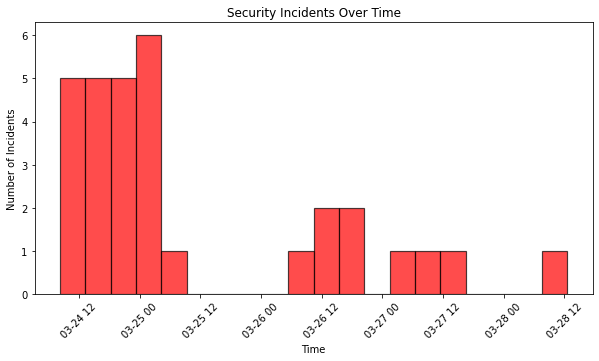

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

incident_query = '''
SELECT timestamp FROM Security_Incidents;
'''
incident_data = pd.read_sql(incident_query, cnxn)
incident_data['timestamp'] = pd.to_datetime(incident_data['timestamp'])

# Plot histogram of security incidents over time
plt.figure(figsize=(10, 5))
plt.hist(incident_data['timestamp'], bins=20, color='red', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.title('Security Incidents Over Time')
plt.xticks(rotation=45)
plt.show()


C:\Users\oxana\AppData\Local\Temp\ipykernel_18328\548297111.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  response_data = pd.read_sql(response_query, cnxn)


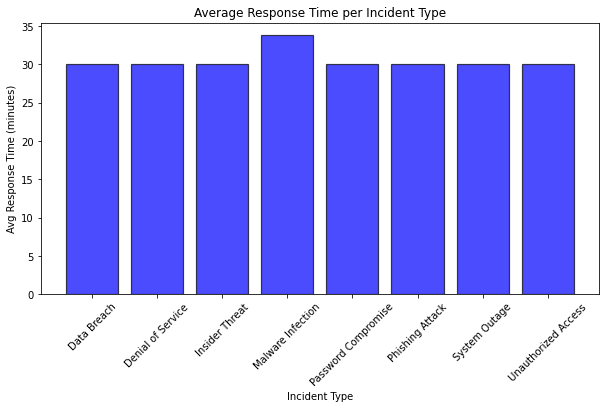

In [3]:
# Query for response times
response_query = '''
SELECT si.incident_type, 
       DATEDIFF(MINUTE, ir.response_start_time, ir.response_end_time) AS response_time
FROM Security_Incidents si
JOIN Incident_Response ir ON si.incident_id = ir.incident_id;
'''
response_data = pd.read_sql(response_query, cnxn)

# Calculate average response time per incident type
avg_response = response_data.groupby('incident_type')['response_time'].mean().reset_index()

# Plot bar chart of average response times
plt.figure(figsize=(10, 5))
plt.bar(avg_response['incident_type'], avg_response['response_time'], color='blue', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.xlabel('Incident Type')
plt.ylabel('Avg Response Time (minutes)')
plt.title('Average Response Time per Incident Type')
plt.xticks(rotation=45)
plt.show()

# MongoDB

In [2]:
import subprocess
import sys

#This function helps to automate the process of package installation 
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pymongo")

import pymongo
mongoclient = pymongo.MongoClient("mongodb://localhost:27017/") #Connecting to the port-- 27017


In [1]:
# Check for the databases that already exist
#print(mongoclient.list_database_names())

In [4]:
#Defining a user function to check if database exists - In MongoDB, a database is not created until it gets content. 
def check_DatabaseExists(argDBName):
    local_dblist = mongoclient.list_database_names()
    if argDBName in local_dblist:
        return f"The database {argDBName} exists."
    else:
        return f"The database {argDBName} does not exist."

#Defining a user function to check if a collection exists - In MongoDB, a collection is not created until it gets content. 
def check_CollectionExists(argDBName, argCollName, local_mydb):
    local_collist = local_mydb.list_collection_names()
    if argCollName in local_collist:
        return f"The collection {argCollName} exists in database {argDBName}."
    else:
        return f"The collection {argCollName} does not exist in database {argDBName}."

In [5]:
mydb = mongoclient["Cybersecurity_Dep"]
print(type(mydb))

<class 'pymongo.synchronous.database.Database'>


In [6]:
access_logs = mydb["Access_logs"]
print(type(access_logs))

<class 'pymongo.synchronous.collection.Collection'>


In [7]:
# Generating the data
from datetime import datetime, timedelta
import random

employee_ids = [f"EMP{str(i).zfill(3)}" for i in range(1, 61)]
vendors_ids = [f"VEND{str(i).zfill(2)}" for i in range(1, 20)]

all_ids = employee_ids + vendors_ids
random_ids = random.choices(all_ids, k=60)

statuses = ["Successful", "Failed"]
browsers = ["Chrome", "Firefox", "Edge", "Safari", "Opera"]
devices = ["Laptop", "Desktop", "Mobile", "Tablet"]
locations = [
    # UK Cities
    {"City": "London", "Country": "UK"},
    {"City": "Manchester", "Country": "UK"},
    {"City": "Birmingham", "Country": "UK"},
    {"City": "Glasgow", "Country": "UK"},
    {"City": "Edinburgh", "Country": "UK"},
    {"City": "Bristol", "Country": "UK"},
    {"City": "Liverpool", "Country": "UK"},
    {"City": "Leeds", "Country": "UK"},
    {"City": "Sheffield", "Country": "UK"},
    {"City": "Cardiff", "Country": "UK"},
    {"City": "Belfast", "Country": "UK"},
    {"City": "Newcastle", "Country": "UK"},

    # Europe
    {"City": "Berlin", "Country": "Germany"},
    {"City": "Munich", "Country": "Germany"},
    {"City": "Hamburg", "Country": "Germany"},
    {"City": "Paris", "Country": "France"},
    {"City": "Lyon", "Country": "France"},
    {"City": "Madrid", "Country": "Spain"},
    {"City": "Barcelona", "Country": "Spain"},
    {"City": "Rome", "Country": "Italy"},
    {"City": "Milan", "Country": "Italy"},
    {"City": "Amsterdam", "Country": "Netherlands"},
    {"City": "Brussels", "Country": "Belgium"},
    {"City": "Vienna", "Country": "Austria"},
    {"City": "Stockholm", "Country": "Sweden"},
    {"City": "Copenhagen", "Country": "Denmark"},
    {"City": "Oslo", "Country": "Norway"},

    # North America
    {"City": "New York", "Country": "USA"},
    {"City": "Los Angeles", "Country": "USA"},
    {"City": "Chicago", "Country": "USA"},
    {"City": "San Francisco", "Country": "USA"},
    {"City": "Toronto", "Country": "Canada"},
    {"City": "Vancouver", "Country": "Canada"},
    {"City": "Montreal", "Country": "Canada"},
    {"City": "Mexico City", "Country": "Mexico"},

    # Asia
    {"City": "Tokyo", "Country": "Japan"},
    {"City": "Osaka", "Country": "Japan"},
    {"City": "Seoul", "Country": "South Korea"},
    {"City": "Beijing", "Country": "China"},
    {"City": "Shanghai", "Country": "China"},
    {"City": "Singapore", "Country": "Singapore"},
    {"City": "Bangkok", "Country": "Thailand"},
    {"City": "Jakarta", "Country": "Indonesia"},
    {"City": "Hong Kong", "Country": "China"},

    # Australia & Middle East
    {"City": "Sydney", "Country": "Australia"},
    {"City": "Melbourne", "Country": "Australia"},
    {"City": "Brisbane", "Country": "Australia"},
    {"City": "Dubai", "Country": "UAE"},
    {"City": "Abu Dhabi", "Country": "UAE"},
    {"City": "Doha", "Country": "Qatar"},
    {"City": "Riyadh", "Country": "Saudi Arabia"},
    {"City": "Istanbul", "Country": "Turkey"}
]

email_subjects = [
    "Urgent: Verify Your Credentials",
    "Your Password Has Been Compromised",
    "Action Required: Update Your Info",
    "Win a Free Trip to Hawaii!",
    "Confirm Your Email Address Now",
    "Security Alert: Suspicious Login Attempt",
    "Important: Program Update",
    "Congratulations! You've Won a Prize",
    "Account Access Suspended - Verify Now",
]
    
email_senders = [
    "security@fakebank.com",
    "support@alertbank.com",
    "no-reply@secure-updates.com",
    "admin@banking.com",
    "info@scam-alerts.com",
    "customer-care@phishingscam.com",
]
    
ip_addresses = [f"192.168.{random.randint(1, 255)}.{random.randint(1, 255)}" for _ in range(50)]

access_logs_data = [
    {
        "_ID": random.choice(all_ids),
        "TIMESTAMP": datetime.now() - timedelta(days=random.randint(0, 30), hours=random.randint(0, 23), minutes=random.randint(0, 59)),
        "IP_ADDRESS": random.choice(ip_addresses),
        "DEVICE": random.choice(devices),
        "BROWSER": random.choice(browsers),
        "LOCATION": random.choice(locations),
        "STATUS": random.choice(statuses)
    }
    for _ in range(60)]

var = access_logs.insert_many(access_logs_data)


phishing = mydb["Phishing_attacks"]
#print(type(phishing))

phishing_attacks_data = [
    {
        "PHISHING_ID": f"PH{str(i).zfill(3)}",
        "_ID": random.choice(all_ids),
        "ANOMALY_SCORE": round(random.uniform(0.5, 1.0), 2),
        "EMAIL_SUBJECT": random.choice(email_subjects),
        "EMAIL_SENDER": random.choice(email_senders),
        "LINK_CLICKED": random.choice([True, False])
    }
    for i in range(1, 61)
]

var2 = phishing.insert_many(phishing_attacks_data)
myresult2 = phishing.find()



In [8]:
#Show documents in collection "Access_logs"
myresult = access_logs.find()

#print the result:
for x in myresult:
    print(x)

{'_id': ObjectId('67e52ec1f4cade82d0fb18f4'), '_ID': 'EMP057', 'TIMESTAMP': datetime.datetime(2025, 3, 8, 18, 9, 57, 542000), 'IP_ADDRESS': '192.168.112.33', 'DEVICE': 'Desktop', 'BROWSER': 'Safari', 'LOCATION': {'City': 'Glasgow', 'Country': 'UK'}, 'STATUS': 'Successful'}
{'_id': ObjectId('67e52ec1f4cade82d0fb18f5'), '_ID': 'VEND08', 'TIMESTAMP': datetime.datetime(2025, 3, 14, 9, 48, 57, 542000), 'IP_ADDRESS': '192.168.131.60', 'DEVICE': 'Mobile', 'BROWSER': 'Opera', 'LOCATION': {'City': 'Paris', 'Country': 'France'}, 'STATUS': 'Failed'}
{'_id': ObjectId('67e52ec1f4cade82d0fb18f6'), '_ID': 'EMP034', 'TIMESTAMP': datetime.datetime(2025, 3, 9, 0, 8, 57, 542000), 'IP_ADDRESS': '192.168.189.80', 'DEVICE': 'Laptop', 'BROWSER': 'Opera', 'LOCATION': {'City': 'Montreal', 'Country': 'Canada'}, 'STATUS': 'Successful'}
{'_id': ObjectId('67e52ec1f4cade82d0fb18f7'), '_ID': 'EMP033', 'TIMESTAMP': datetime.datetime(2025, 2, 26, 4, 16, 57, 542000), 'IP_ADDRESS': '192.168.83.1', 'DEVICE': 'Desktop', '

In [9]:
#print the result:
for x in myresult2:
    print(x)

{'_id': ObjectId('67e52ee3f4cade82d0fb1930'), 'PHISHING_ID': 'PH001', '_ID': 'VEND09', 'ANOMALY_SCORE': 0.96, 'EMAIL_SUBJECT': 'Security Alert: Suspicious Login Attempt', 'EMAIL_SENDER': 'info@scam-alerts.com', 'LINK_CLICKED': True}
{'_id': ObjectId('67e52ee3f4cade82d0fb1931'), 'PHISHING_ID': 'PH002', '_ID': 'EMP040', 'ANOMALY_SCORE': 0.93, 'EMAIL_SUBJECT': 'Win a Free Trip to Hawaii!', 'EMAIL_SENDER': 'security@fakebank.com', 'LINK_CLICKED': False}
{'_id': ObjectId('67e52ee3f4cade82d0fb1932'), 'PHISHING_ID': 'PH003', '_ID': 'EMP021', 'ANOMALY_SCORE': 0.73, 'EMAIL_SUBJECT': 'Your Password Has Been Compromised', 'EMAIL_SENDER': 'security@fakebank.com', 'LINK_CLICKED': False}
{'_id': ObjectId('67e52ee3f4cade82d0fb1933'), 'PHISHING_ID': 'PH004', '_ID': 'EMP045', 'ANOMALY_SCORE': 0.67, 'EMAIL_SUBJECT': "Congratulations! You've Won a Prize", 'EMAIL_SENDER': 'no-reply@secure-updates.com', 'LINK_CLICKED': True}
{'_id': ObjectId('67e52ee3f4cade82d0fb1934'), 'PHISHING_ID': 'PH005', '_ID': 'EMP0

In [22]:
# Function to count unsuccessful login attempts for a user
def count_failed_logins(user_id):
    return user_id, access_logs.count_documents({"_ID": user_id, "STATUS": "Failed"})

# Function to detect users logging in from multiple locations or devices
def detect_suspicious_logins():
    user_logins = {}
    for log in access_logs.find():
        user_id = log["_ID"]
        location = log["LOCATION"]["City"] + ", " + log["LOCATION"]["Country"]
        device = log["DEVICE"]

        if user_id in user_logins:
            prev_location, prev_device = user_logins[user_id]
            if prev_location != location or prev_device != device:
                print(f"Suspicious login detected for {user_id}: "
                      f"Previously logged in from {prev_location} using {prev_device}, "
                      f"now logging in from {location} using {device}")
        user_logins[user_id] = (location, device)


from datetime import datetime, time

# Function to detect unusual login times
def detect_unusual_times():
    normal_hours = (time(6, 0), time(22, 0))  # Define normal login hours (6 AM - 10 PM)

    for log in access_logs.find():
        login_time = log["TIMESTAMP"].time()
        if login_time < normal_hours[0] or login_time > normal_hours[1]:
            print(f"Unusual login time detected for {log['_ID']}: {login_time}")

In [19]:
users = []
for i in all_ids:
    if count_failed_logins(i)[1] >= 2:
        users.append(i)
        print(f"Block {count_failed_logins(i)[0]}  account for 15 mins")
print(f"Send notification to the cybersecurity team to check the following users: {users}")

Block EMP003  account for 15 mins
Block EMP012  account for 15 mins
Block EMP014  account for 15 mins
Block EMP020  account for 15 mins
Block EMP030  account for 15 mins
Block EMP037  account for 15 mins
Block EMP043  account for 15 mins
Block EMP046  account for 15 mins
Block EMP056  account for 15 mins
Block EMP057  account for 15 mins
Block EMP059  account for 15 mins
Block VEND04  account for 15 mins
Block VEND08  account for 15 mins
Block VEND11  account for 15 mins
Block VEND14  account for 15 mins
Block VEND15  account for 15 mins
Block VEND18  account for 15 mins
Block VEND19  account for 15 mins
Send notification to the cybersecurity team to check the following users: ['EMP003', 'EMP012', 'EMP014', 'EMP020', 'EMP030', 'EMP037', 'EMP043', 'EMP046', 'EMP056', 'EMP057', 'EMP059', 'VEND04', 'VEND08', 'VEND11', 'VEND14', 'VEND15', 'VEND18', 'VEND19']


In [20]:
detect_suspicious_logins()

Suspicious login detected for EMP034: Previously logged in from Montreal, Canada using Laptop, now logging in from Stockholm, Sweden using Mobile
Suspicious login detected for EMP034: Previously logged in from Stockholm, Sweden using Mobile, now logging in from Copenhagen, Denmark using Laptop
Suspicious login detected for EMP034: Previously logged in from Copenhagen, Denmark using Laptop, now logging in from Hamburg, Germany using Mobile
Suspicious login detected for VEND04: Previously logged in from Barcelona, Spain using Laptop, now logging in from Barcelona, Spain using Mobile
Suspicious login detected for VEND14: Previously logged in from Lyon, France using Tablet, now logging in from Birmingham, UK using Mobile
Suspicious login detected for EMP021: Previously logged in from Rome, Italy using Desktop, now logging in from Bristol, UK using Mobile
Suspicious login detected for EMP046: Previously logged in from Abu Dhabi, UAE using Desktop, now logging in from Chicago, USA using Mobi

In [23]:
detect_unusual_times()

Unusual login time detected for EMP034: 00:08:57.542000
Unusual login time detected for EMP033: 04:16:57.542000
Unusual login time detected for EMP034: 22:37:57.542000
Unusual login time detected for EMP034: 05:04:57.542000
Unusual login time detected for EMP043: 00:06:57.542000
Unusual login time detected for VEND14: 04:22:57.543000
Unusual login time detected for EMP029: 04:42:57.543000
Unusual login time detected for EMP021: 03:24:57.543000
Unusual login time detected for EMP034: 00:32:57.543000
Unusual login time detected for EMP012: 00:22:57.543000
Unusual login time detected for EMP060: 04:10:57.543000
Unusual login time detected for VEND04: 02:39:57.543000
Unusual login time detected for VEND14: 04:42:57.543000
Unusual login time detected for EMP056: 03:47:57.543000
Unusual login time detected for VEND07: 05:50:57.543000
Unusual login time detected for EMP008: 05:00:57.543000
Unusual login time detected for EMP028: 01:23:57.543000
Unusual login time detected for VEND17: 22:38:57

In [10]:
high_risk_emails = list(phishing.find({"ANOMALY_SCORE": {"$gt": 0.8}}, {"EMAIL_SENDER": 1, "_ID": 1, "ANOMALY_SCORE": 1 , "_id": 0})) #Filtering the data + projection

for email in high_risk_emails:
    print(f"Employee ID: {email['_ID']}, Email Sender: {email['EMAIL_SENDER']}, Anomaly score: {email['ANOMALY_SCORE']}")

clicked_count = phishing.count_documents({"LINK_CLICKED": True})
print(f"Number of phishing emails where the link was clicked: {clicked_count}")

Employee ID: VEND09, Email Sender: info@scam-alerts.com, Anomaly score: 0.96
Employee ID: EMP040, Email Sender: security@fakebank.com, Anomaly score: 0.93
Employee ID: EMP037, Email Sender: security@fakebank.com, Anomaly score: 0.98
Employee ID: VEND17, Email Sender: customer-care@phishingscam.com, Anomaly score: 0.83
Employee ID: VEND18, Email Sender: info@scam-alerts.com, Anomaly score: 0.97
Employee ID: EMP017, Email Sender: support@alertbank.com, Anomaly score: 1.0
Employee ID: EMP005, Email Sender: admin@banking.com, Anomaly score: 0.87
Employee ID: VEND10, Email Sender: security@fakebank.com, Anomaly score: 0.83
Employee ID: EMP051, Email Sender: admin@banking.com, Anomaly score: 0.86
Employee ID: EMP012, Email Sender: admin@banking.com, Anomaly score: 0.89
Employee ID: VEND16, Email Sender: admin@banking.com, Anomaly score: 0.91
Employee ID: EMP051, Email Sender: no-reply@secure-updates.com, Anomaly score: 0.85
Employee ID: EMP026, Email Sender: no-reply@secure-updates.com, Anom

In [11]:
#Group by email sender and count phishing attempts
pipeline = [
    {"$group": {"_id": "$EMAIL_SENDER", "count": {"$sum": 1}}}
] #Helps to automate the process of aggregation 

result = list(phishing.aggregate(pipeline))

for r in result:
    print(f"Email address: {r['_id']}, Count:  {r['count']}")

Email address: info@scam-alerts.com, Count:  29
Email address: customer-care@phishingscam.com, Count:  24
Email address: no-reply@secure-updates.com, Count:  35
Email address: security@fakebank.com, Count:  32
Email address: support@alertbank.com, Count:  24
Email address: admin@banking.com, Count:  36


In [12]:
#Find the most common phishing email subject
pipeline = [
    {"$group": {"_id": "$EMAIL_SUBJECT", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}, #sorting
    {"$limit": 1}
]

most_common_subject = list(phishing.aggregate(pipeline))

for i in most_common_subject:
    print(f"Email subject: {i['_id']}, Count:  {i['count']}")

Email subject: Congratulations! You've Won a Prize, Count:  27


In [ ]:
#droping collections

#phishing.drop()
#access_logs.drop()

In [ ]:
# droping the database
#mongoclient.drop_database("Cybersecurity_Dep")